![housesbanner](housesbanner.png "housesbanner")

# **Problem Statement  :**

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers . Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s data-set proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.<br><br>
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## **Real World/ Business Objectives and Constraints :**
- ### **Objectives:**
    - Predict the sale price for each house.
    - Minimize the difference between predicted and actual rating (RMSE/MSE)
- ### **Constraints:**
    - Some form of interpretability.


### **About the data:**
1. Number of data points in train data:1460
2. Number of features in train data: 81
3. Number of data points in test data: 1459
4. Number of features in test data: 80



### **Data fields**
Here's a brief version of what you'll find in the data description file.

> - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### **Machine Learning Objective and Constraints:**
1. Minimize RMSE.
2. Try to provide some interpretability.

### Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore warnings.

%config IPCompleter.greedy = True # autocomplete feature.
%matplotlib inline

pd.options.display.precision = 2 # set the precision of floating point numbers.

In [107]:
from matplotlib import rcParams, cycler
rcParams['figure.figsize'] = 10,5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5
# rcParams['axes.prop_cycle'] = cycler(color=['#424242'])
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.titlesize'] = 'x-large'
rcParams['legend.fontsize'] = 'large'

### Read the dataset

In [108]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
train=pd.read_csv("https://raw.githubusercontent.com/udaypratapyati/insaid/master/GCD/Projects/HousePricePrediction/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/udaypratapyati/insaid/master/GCD/Projects/HousePricePrediction/test.csv")
print(train.shape, test.shape)

(1460, 81) (1459, 80)


#### Adding source column to each dataset for identification and then combine them

In [109]:
#Adding source
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 82) (1459, 81)


#### Combine datasets

In [110]:
df = pd.concat([train, test])
df.shape

(2919, 82)

### OverallQual:

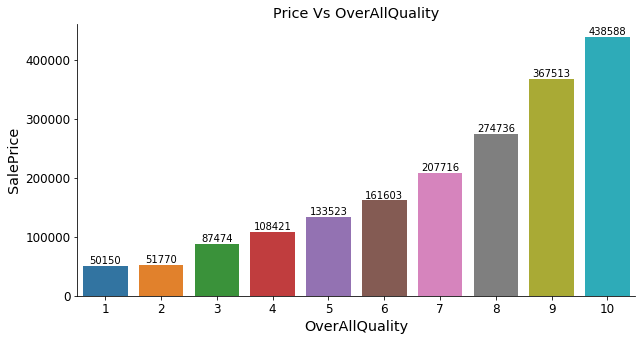

In [111]:
# plt.subplots(figsize=(12,5))
graph = sns.barplot(df.OverallQual,df.SalePrice, ci=None)
plt.title("Price Vs OverAllQuality")
plt.xlabel('OverAllQuality')

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom', color= 'black')
name='Price Vs OverAllQuality'      
plt.savefig('images/{}.png'.format(name))

### Analysing SalePrice
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

Skewness: 1.882876
Kurtosis: 6.536282


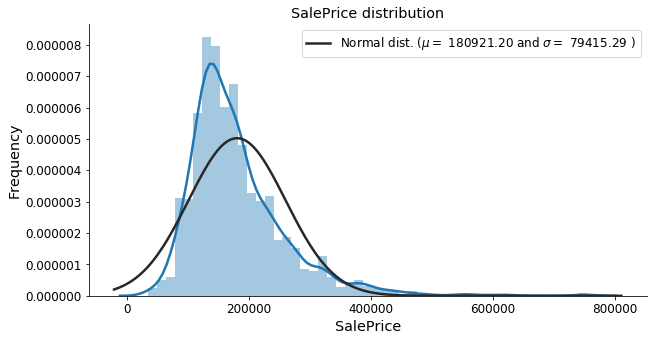

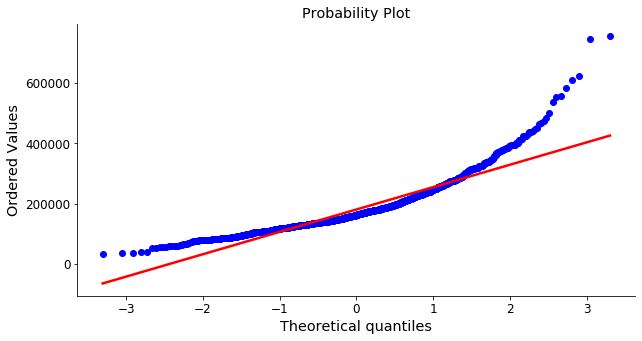

In [112]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

tmpdf = df[:1460]

# First things first: analysing 'SalePrice'
(mu, sigma) = norm.fit(tmpdf.SalePrice)
sns.distplot(tmpdf.SalePrice, fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

name='SalePrice distribution Before1'      
plt.savefig('images/{}.png'.format(name))

fig = plt.figure()
# plt.subplots(figsize=(12,5))
res = stats.probplot(tmpdf['SalePrice'], plot=plt)
# plt.show()

name='SalePrice distribution Before'      
plt.savefig('images/{}.png'.format(name))

#skewness and kurtosis
print("Skewness: %f" % tmpdf['SalePrice'].skew())
print("Kurtosis: %f" % tmpdf['SalePrice'].kurt())

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed


kurtosis(X)=E[(X−μσ)4] 
https://en.wikipedia.org/wiki/Kurtosis

Skewness: 0.121347
Kurtosis: 0.809519


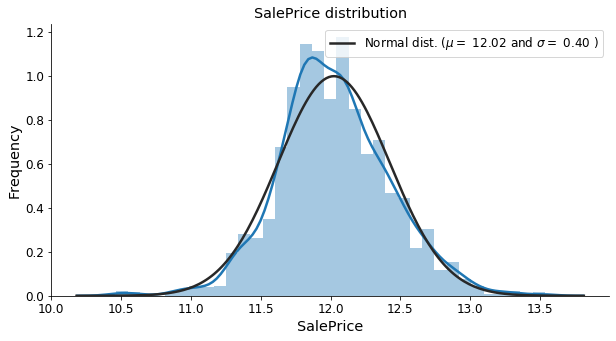

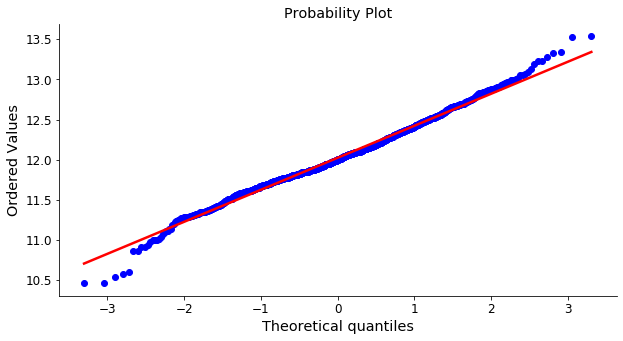

In [113]:
# First things first: analysing 'SalePrice'
sales_normal = np.log1p(tmpdf.SalePrice)

(mu, sigma) = norm.fit(sales_normal)
sns.distplot(sales_normal, fit=norm)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

name='SalePrice distribution After1'      
plt.savefig('images/{}.png'.format(name))

#skewness and kurtosis
print("Skewness: %f" % sales_normal.skew())
print("Kurtosis: %f" % sales_normal.kurt())

fig = plt.figure()
res = stats.probplot(sales_normal, plot=plt)
# plt.show()

name='SalePrice distribution After'      
plt.savefig('images/{}.png'.format(name))

### Find Missing Value Columns
- Lets find the percentage of missing values for all the columns that have missing values.
- Python represents missing data a NaN and are identified by isnull() function.

In [114]:
df.columns[df.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

In [115]:
#percentage of missing values
null_df = df.columns[df.isnull().any()] # Gives the col names that have null values
num = df[null_df].isnull().sum()
num = num.sort_values(ascending=False)[:20]
perct = round(num/len(df), 2) * 100
missing_data = pd.DataFrame({'Missing Count' : num, 'Missing Ratio' : perct})
missing_data.head(20)

,Missing Count,Missing Ratio
PoolQC,2909,100.0
MiscFeature,2814,96.0
Alley,2721,93.0
Fence,2348,80.0
SalePrice,1459,50.0
FireplaceQu,1420,49.0
LotFrontage,486,17.0
GarageQual,159,5.0
GarageCond,159,5.0
GarageFinish,159,5.0


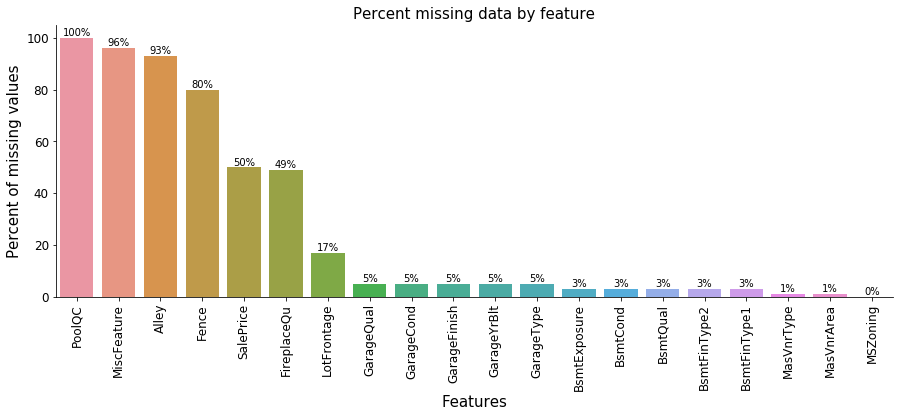

In [116]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
# graph = sns.barplot(x=num.index, y=num)
graph = sns.barplot(x=missing_data.index, y=missing_data['Missing Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

for p in graph.patches:
    graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                ha='center', va='bottom', color= 'black')
    
name='Percent missing data by feature'      
plt.savefig('images/{}.png'.format(name))    

That is a long list of columns that have missing values.
In certain cases columns will have zero values which can be considered as missing values. Hence we will also look at columns having data as zero and express that as percentage of total data.

In [117]:
#percentage of zero values for each numeric variable
zero_df = df.columns[(df == 0).any()]
num = (df[zero_df] == 0).sum()
num = num.sort_values(ascending=False)[:20]
perct = round(num/len(df), 2) * 100
missing_data = pd.DataFrame({'Zero Val Count' : num, 'Zero Val Ratio' : perct})
missing_data.head(20)

,Zero Val Count,Zero Val Ratio
PoolArea,2906,100.0
3SsnPorch,2882,99.0
LowQualFinSF,2879,99.0
MiscVal,2816,96.0
BsmtHalfBath,2742,94.0
ScreenPorch,2663,91.0
BsmtFinSF2,2571,88.0
EnclosedPorch,2460,84.0
HalfBath,1834,63.0
MasVnrArea,1738,60.0


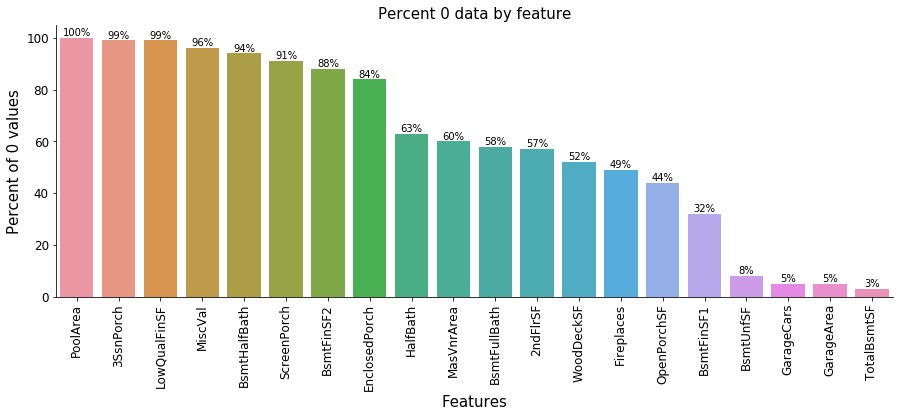

In [118]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
# graph = sns.barplot(x=num.index, y=num)
graph = sns.barplot(x=missing_data.index, y=missing_data['Zero Val Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of 0 values', fontsize=15)
plt.title('Percent 0 data by feature', fontsize=15)

for p in graph.patches:
    graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                ha='center', va='bottom', color= 'black')
    
name='Percent of 0 data by feature'      
plt.savefig('images/{}.png'.format(name))   

Now that we have all the columns with missing and zero values data, we will use some basic techniques to impute them with some appropriate values.

### Drop unwanted columns
- First i would like drop the features that have more than 90% missing data because their contribution to the model is very insignificant.
- Alley, MiscFeature, PoolQC – these have more than 90% missing data
- BsmtHalfBath, LowQualFinSF, MiscVal, PoolArea – These are numeric features which have more than 90% data as zeros.
- We will drop all these columns except for BsmtHalfBath, 3SsnPorch, ScreenPorch which we will look at later stages.

In [119]:
drop_col = ['Alley','LowQualFinSF', 'MiscFeature', 'MiscVal','PoolArea', 'PoolQC']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2919, 76)

### Relationship with numerical variables

#### scatter plot grlivarea/saleprice

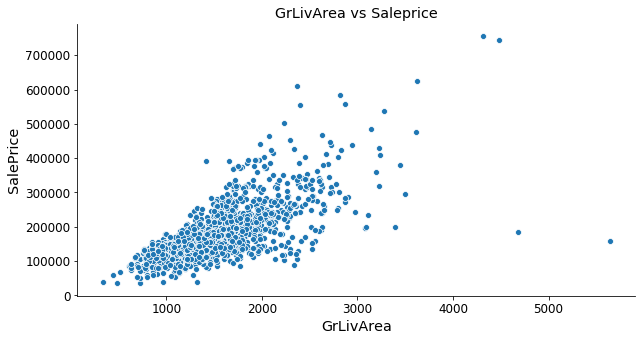

In [120]:
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs Saleprice')

name='GrLivArea vs Saleprice'      
plt.savefig('images/{}.png'.format(name)) 

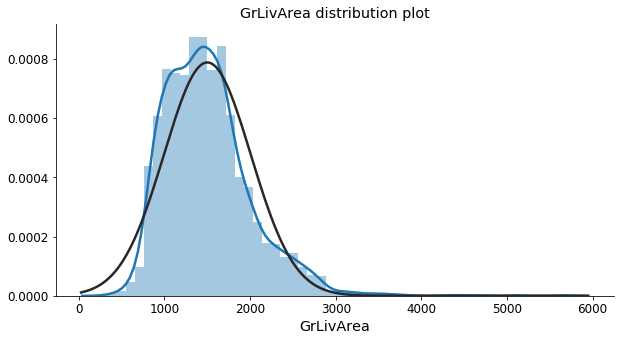

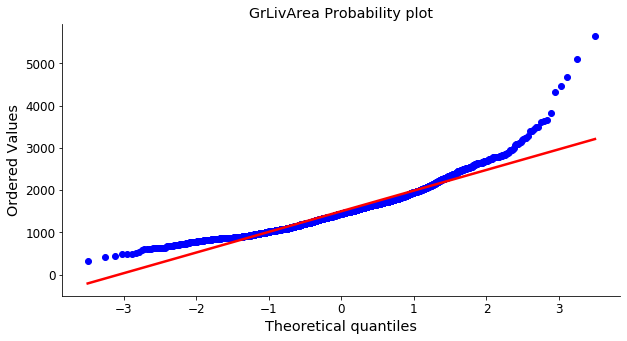

In [121]:
sns.distplot(df['GrLivArea'], fit=norm);
plt.title('GrLivArea distribution plot')

name='GrLivArea distribution plot'      
plt.savefig('images/{}.png'.format(name)) 

fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)
plt.title('GrLivArea Probability plot')

name='GrLivArea Probability plot'      
plt.savefig('images/{}.png'.format(name)) 

 It seems that 'SalePrice' and 'GrLivArea' have a linear relationship.

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

#### scatter plot totalbsmtsf/saleprice

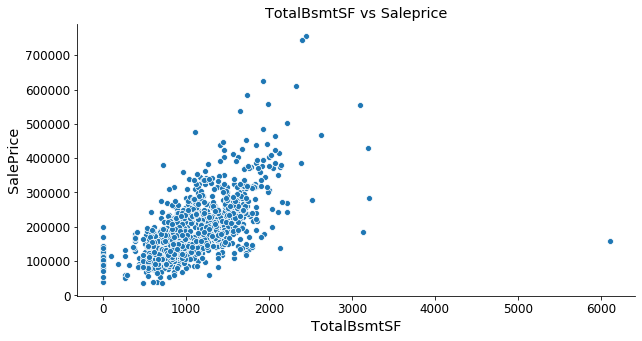

In [122]:
sns.scatterplot(x=df.TotalBsmtSF, y=df.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('TotalBsmtSF vs Saleprice')

name='TotalBsmtSF vs Saleprice'      
plt.savefig('images/{}.png'.format(name)) 

In [123]:
# sns.distplot(df['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df['TotalBsmtSF'], plot=plt)

 It seems that 'SalePrice' and 'TotalBsmtSF' have a linear relationship.

#### Box plot overallqual/saleprice

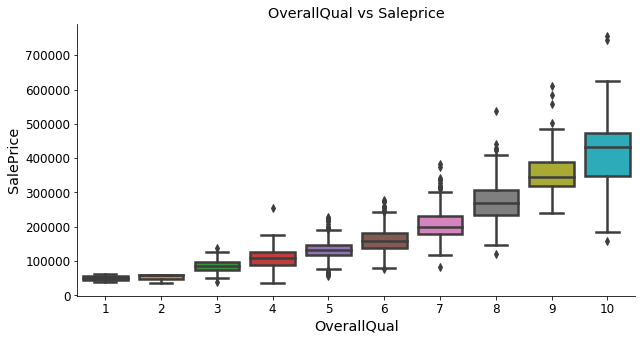

In [124]:
sns.boxplot(data=df, x=df.OverallQual, y=df.SalePrice)
# sns.barplot(x=df.OverallQual, y=df.SalePrice, ci=None)
# sns.scatterplot(x=df.OverallQual, y=df.SalePrice)

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs Saleprice')

name='OverallQual vs Saleprice'      
plt.savefig('images/{}.png'.format(name)) 

It seems that 'SalePrice' and 'OverallQual' have a linear relationship.

#### Box plot YearBuilt/saleprice

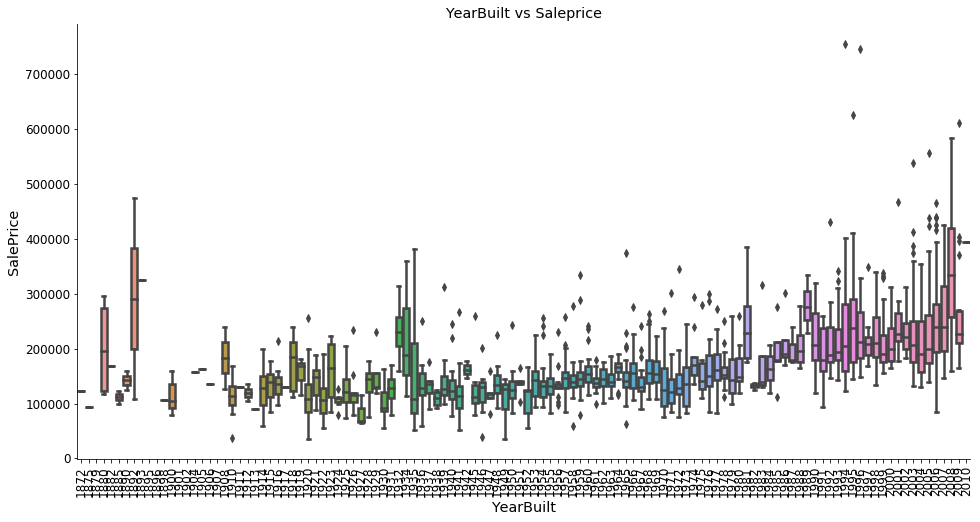

In [125]:
# sns.scatterplot(x=df.YearBuilt, y=df.SalePrice)
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df, x=df.YearBuilt, y=df.SalePrice)
plt.xticks(rotation='90')

plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt vs Saleprice')

name='YearBuilt vs Saleprice'      
plt.savefig('images/{}.png'.format(name)) 

'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

### Imputing missing values for – BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual
- These features seem to have equal number of missing values
- Description for above variables is given as  ‘NA’   = ‘No Basement’.
- First we will change NA for the above fields to something Python can read instead of considering them as missing values

In [126]:
df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']].isnull().sum()

BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
BsmtQual        81
dtype: int64

In [127]:
col = ['BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
for i in col:
    Nan_rows = df[i].isnull()
    df.loc[Nan_rows, i] = 'None'
    print ('Null values of {} is: {:d}' .format(i, df[i].isnull().sum()))

Null values of BsmtCond is: 0
Null values of BsmtExposure is: 0
Null values of BsmtFinType1 is: 0
Null values of BsmtFinType2 is: 0
Null values of BsmtQual is: 0


### Lets examine BsmtFinSF1 and BsmtFinSF2

In [128]:
zero_bfsf1 = (df['BsmtFinSF1'] == 0)
print (df.loc[zero_bfsf1, ].groupby('BsmtFinType1').BsmtFinSF1.count())

print("#"*65)

zero_bfsf2 = (df['BsmtFinSF2'] == 0)
print (df.loc[zero_bfsf2, ].groupby('BsmtFinType2').BsmtFinSF1.count())

BsmtFinType1
None     78
Unf     851
Name: BsmtFinSF1, dtype: int64
#################################################################
BsmtFinType2
BLQ        1
None      78
Unf     2492
Name: BsmtFinSF1, dtype: int64


- BsmtFinSF1 and BsmtFinSF2 can have zero values where BsmtFinType1 or BsmntFinType2 are NA or Unf (unfinished)
- I would assume that to be treated as no basement
- Hence changing unf values to None for bsmtFinType1 and BsmntFinType2

In [129]:
Unf_rows = (df['BsmtFinType1'] == 'Unf')
df.loc[Unf_rows,'BsmtFinType1'] = 'None'
print('Valuecount of BsmtFinType1: ', df['BsmtFinType1'].value_counts())

print("#"*65)

Unf_rows = (df['BsmtFinType2'] == 'Unf')
df.loc[Unf_rows,'BsmtFinType2'] = 'None'
print('Valuecount of BsmtFinType2: ', df['BsmtFinType2'].value_counts())

Valuecount of BsmtFinType1:  None    930
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
Name: BsmtFinType1, dtype: int64
#################################################################
Valuecount of BsmtFinType2:  None    2573
Rec      105
LwQ       87
BLQ       68
ALQ       52
GLQ       34
Name: BsmtFinType2, dtype: int64


- We will look at zero values for BsmtUnfSF

In [130]:
zero_df = (df['BsmtUnfSF'] == 0)
df.loc[zero_df, ].groupby('BsmtCond').BsmtUnfSF.count()

BsmtCond
Fa        8
Gd       20
None     79
TA      134
Name: BsmtUnfSF, dtype: int64

This shows that 79 are genuine zero values as there is no basement and we need to impute the remaining

In [131]:
print('Zero Values for BsmtUnfSF Before: ', df.loc[zero_df,'BsmtUnfSF'].count())
zero_df = ((df['BsmtUnfSF'] == 0) & (df['BsmtCond'] != 'None'))
df.loc[zero_df,'BsmtUnfSF'] = df['BsmtUnfSF'].mean()
print('Zero Values for BsmtUnfSF After: ', df.loc[zero_df,'BsmtUnfSF'].count())

Zero Values for BsmtUnfSF Before:  241
Zero Values for BsmtUnfSF After:  162


### Garage Parameters
- Description says  ‘NA’ or null values on GarageCond mean ‘No Garage’ which is same for other garage features.
- Numeric Garage fields ‘GarageArea’, GarageCars and GarageYrBlt should be made zero for rows where GarageCond is null

In [132]:
null_g = df['GarageCond'].isnull()
df.loc[null_g, ['GarageCond','GarageFinish','GarageQual','GarageType']] = 'None'
df.loc[null_g, ['GarageArea','GarageCars','GarageYrBlt']] = 0

### Imputing FireplaceQu

- Null values mean no Fireplace, hence we will fill the with ‘None’.
- Also zero values in Fireplaces correspond to null value rows of FireplaceQu which is correct.

In [133]:
null_f = df['FireplaceQu'].isnull()
df.loc[null_f, 'FireplaceQu'] = 'None'

### Imputing Fence and LotFrontage

- Null values in fence means No Fence according to description, hence imputing with ‘None’
- LotFrontage has null values which we will impute with mean

In [134]:
df['Fence'].fillna('None', inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
print ('Null values of Fence: ', df['Fence'].isnull().sum())
print ('Null values of LotFrontage: ', df['LotFrontage'].isnull().sum())

Null values of Fence:  0
Null values of LotFrontage:  0


### Imputing MasVnrArea and MasVnrType
- All Null values of MasVnrType will be filled with ‘None’ and corresponding MasVnrArea will be zero
- MasVnrType with MasVnrArea are related. If area is zero then type should be ‘None’ according to description
- Similarly of type is ‘None’ then Area should be zero
- Hence we will update MasVnrType as ‘None’ where MasVnrArea is zero
- Also all Null values of Type fill be filled with ‘None’ and corresponding Area will be zero

In [135]:
null_m = df['MasVnrType'].isnull()
df.loc[null_m, 'MasVnrArea'] = 0
df.loc[null_m, 'MasVnrType'] = 'None'

null_m = (df['MasVnrArea'] == 0)
df.loc[null_m, 'MasVnrType'] = 'None'

null_m = (df['MasVnrType'] == 'None')
df.loc[null_m, 'MasVnrArea'] = 0

### Now we will do some FEATURE ENGINEERING try to impute missing values

- We will combine OpenPorch, EnclosedPorch, 3SsnPorch and Screenporch into a single variable.
- Instead of porch area, we will mark the new variable as 1 for Porch exists and 0 for No Porch

In [136]:
df['Porch'] = df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
df['Porch'] = df['Porch'].astype(bool).astype(int)

df['Porch'].value_counts()

1    2046
0     873
Name: Porch, dtype: int64

- We will now combine FullBath, BsmtFullBath and HalfBath, BsmtHalfBath to show the total number of Full and Half Bathrooms

In [137]:
df['FullBath'] = df['FullBath'] + df['BsmtFullBath']
df['HalfBath'] = df['HalfBath'] + df['BsmtHalfBath']

Since we created new features from existing ones, lets drop them

In [138]:
drop_col = ['BsmtFullBath','BsmtHalfBath', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF','ScreenPorch']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2919, 71)

Now we are sure we have addressed the zero value features and most of the missing values in other features.<br>
lets see what else is remaining in completing our missing data exercise

In [139]:
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
num

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
FullBath          2
Functional        2
HalfBath          2
KitchenQual       1
MSZoning          4
SalePrice      1459
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64

- SalePrice is the feature we need to predict, hence ignore that
- There are some continuous & categorical features left with missing data.
- For Continuous variables, we will impute with MEAN and for categorical data we will impute with MODE

In [140]:
cont_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
cat_col = ['Electrical', 'Exterior1st', 'Exterior2nd', 'FullBath', 'Functional', 'HalfBath', 'KitchenQual',
           'MSZoning','SaleType','Utilities']
for i in cont_col:
    df[i].fillna(df[i].mean(), inplace=True)
    print('Null values left for {} is: {:d}'.format(i, df[i].isnull().sum()))
    
for j in cat_col:
    df[j].fillna(df[j].mode()[0], inplace=True)
    print('Null values left for {} is: {:d}'.format(j, df[j].isnull().sum()))

Null values left for BsmtFinSF1 is: 0
Null values left for BsmtFinSF2 is: 0
Null values left for BsmtUnfSF is: 0
Null values left for TotalBsmtSF is: 0
Null values left for Electrical is: 0
Null values left for Exterior1st is: 0
Null values left for Exterior2nd is: 0
Null values left for FullBath is: 0
Null values left for Functional is: 0
Null values left for HalfBath is: 0
Null values left for KitchenQual is: 0
Null values left for MSZoning is: 0
Null values left for SaleType is: 0
Null values left for Utilities is: 0


- Lets check again

In [141]:
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
num

SalePrice    1459
dtype: int64

Now we have a cleaned data without any missing data which is ready to be processed further building the ML model. Lets save the cleaned data which we will use in the next steps of building a Machine Learning model.
<br>The dataset is not yet completely ready as there are some outliers (extreme values) in the data and might also need more Feature Engineering

In [142]:
from sklearn.externals import joblib
joblib.dump(df, 'cleaned_Dataset')

['cleaned_Dataset']

In [143]:
from sklearn.externals import joblib
df = joblib.load('cleaned_Dataset')
df.shape

(2919, 71)

### Let us try to find outliers in continuous variables like: ‘1stFlrSF’,’2ndFlrSF’,’TotalBsmtSF’

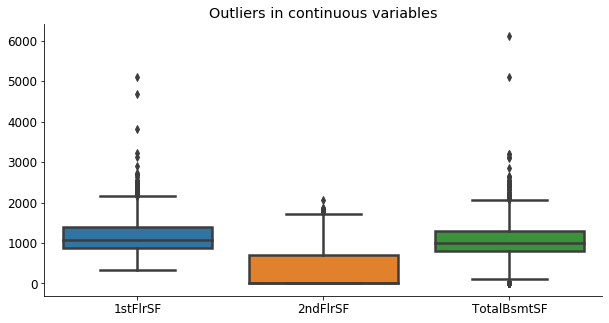

In [144]:
sns.boxplot(data=df[['1stFlrSF','2ndFlrSF','TotalBsmtSF']], orient='v')

plt.title('Outliers in continuous variables')

name='Outliers in continuous variables'      
plt.savefig('images/{}.png'.format(name)) 

Clearly we can see there are some extreme values for 1stFlrSF and TotalBsmtSF. However we will not do an outlier treatment now because we will do some Feature Engineering to them. We will combine all of them as TotalSF and see how the boxplot shows up.

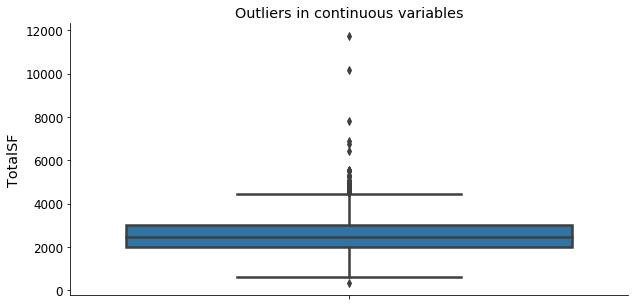

In [145]:
#Feature Engineering
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
sns.boxplot(x=df['TotalSF'], orient='v')

plt.ylabel('TotalSF')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables1'      
plt.savefig('images/{}.png'.format(name)) 

Now lets see for TotalSF, GrLivArea and LotFrontage

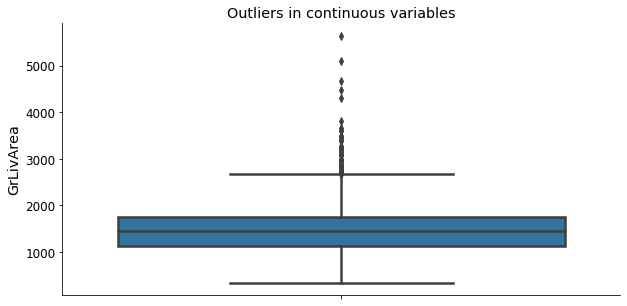

In [146]:
sns.boxplot(x=df['GrLivArea'], orient='v')

plt.ylabel('GrLivArea')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables2' 
plt.savefig('images/{}.png'.format(name)) 

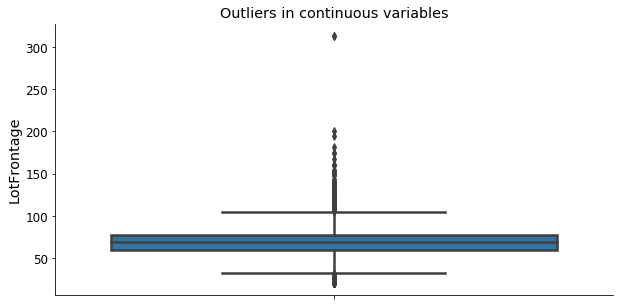

In [147]:
sns.boxplot(x=df['LotFrontage'], orient='v')
plt.ylabel('LotFrontage')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables3' 
plt.savefig('images/{}.png'.format(name)) 

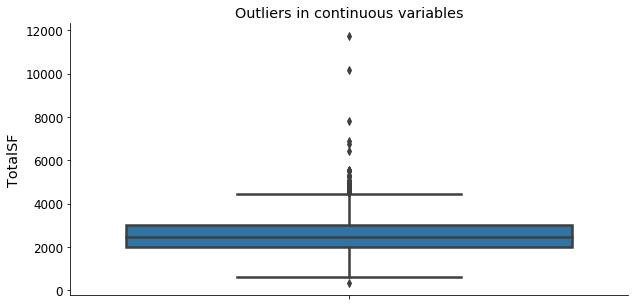

In [148]:
sns.boxplot(x=df['TotalSF'], orient='v')
plt.ylabel('TotalSF')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables4' 
plt.savefig('images/{}.png'.format(name)) 

Clearly there are some extreme outliers in the data. We will use log transformation to reduce the variation which means the outliers will be removed completely but extreme values become reasonably better.

Log transforming TotalSF, GrLivArea, LotFrontage

In [149]:
#Log transforming
df['GrLivArea'] = np.log(df['GrLivArea'])
df['LotFrontage'] = np.log(df['LotFrontage'])
df['TotalSF'] = np.log(df['TotalSF'])

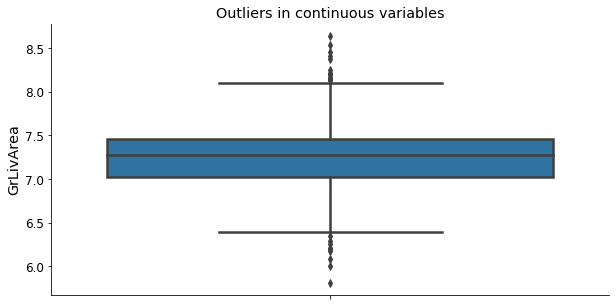

In [150]:
sns.boxplot(x=df['GrLivArea'], orient='v')

plt.ylabel('GrLivArea')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables5' 
plt.savefig('images/{}.png'.format(name)) 

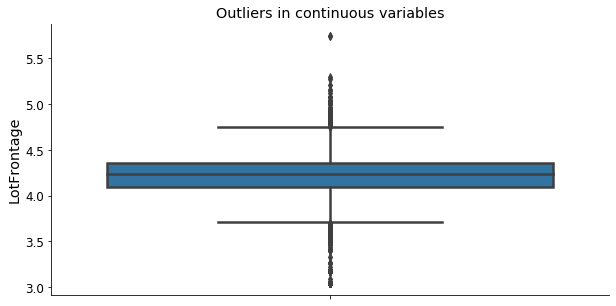

In [151]:
sns.boxplot(x=df['LotFrontage'], orient='v')
plt.ylabel('LotFrontage')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables6' 
plt.savefig('images/{}.png'.format(name)) 

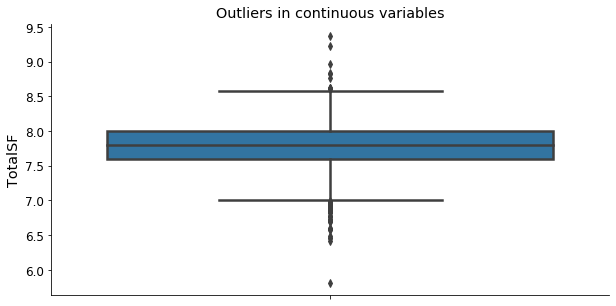

In [152]:
sns.boxplot(x=df['TotalSF'], orient='v')
plt.ylabel('TotalSF')
plt.title('Outliers in continuous variables')

name='Outliers in continuous variables7' 
plt.savefig('images/{}.png'.format(name)) 

In [88]:
#plotting after transformation
# sns.boxplot(x=df['GrLivArea'], orient='v')
# plt.show()
# sns.boxplot(x=df['LotFrontage'], orient='v')
# plt.show()
# sns.boxplot(x=df['TotalSF'], orient='v')

It is evident from the above graphs that extreme outliers are treated.

We can combine BedroomAbvGr and TotRmsAbvGrd into TotalRooms.<br>
Following that we will drop all the variables which were feature engineered

In [153]:
# if '1stFlrSF' in list(df.columns):
#     print ('yes')
# else :
#     print('No')
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond', 'OverallQual',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice',
       'SaleType', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities',
       'WoodDeckSF', 'YearBui

In [154]:
df['TotalRooms'] = df['BedroomAbvGr'] + df['TotRmsAbvGrd']

# Drop Feature engineered columns
col_fe = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BedroomAbvGr','TotRmsAbvGrd']
df.drop(col_fe, axis=1, inplace=True)
print('Total Features after removing engineered features: ', (df.shape))

Total Features after removing engineered features:  (2919, 65)


### Split into train and test datasets

In [155]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']
print(train.shape, test.shape)

(1460, 65) (1459, 65)


In [574]:
# y_val = train.SalePrice
# train.drop('SalePrice', axis=1, inplace=True)
# test.drop('SalePrice', axis=1, inplace=True)
# print(train.shape, test.shape)

For categorical variables we will try to find the percentage of most frequent value. In other words percentage of frequency.

In [156]:
#identifying numerical and categorical features
num_feat = train.dtypes[train.dtypes != 'object'].index
print('Total of numeric features: ', len(num_feat))
cat_feat = train.dtypes[train.dtypes == 'object'].index
print('Total of categorical features: ', len(cat_feat))

Total of numeric features:  24
Total of categorical features:  41


We will modify yearbuilt and yearremodadd as their respective ages from the year of sale

In [157]:
df['YearBltAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df.shape

(2919, 67)

In [158]:
df.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)
df.shape

(2919, 65)

In [160]:
# Highest value Frequency percentage in categorical variables 
for i in list(cat_feat):
    pct = (df[i].value_counts()[0] / len(df))*100
    print('Highest value Percentage of {}: {:3f} %'.format(i, pct))

Highest value Percentage of BldgType: 83.076396 %
Highest value Percentage of BsmtCond: 89.277150 %
Highest value Percentage of BsmtExposure: 65.227818 %
Highest value Percentage of BsmtFinType1: 31.860226 %
Highest value Percentage of BsmtFinType2: 88.146626 %
Highest value Percentage of BsmtQual: 43.953409 %
Highest value Percentage of CentralAir: 93.285372 %
Highest value Percentage of Condition1: 86.022610 %
Highest value Percentage of Condition2: 98.972251 %
Highest value Percentage of Electrical: 91.538198 %
Highest value Percentage of ExterCond: 86.947585 %
Highest value Percentage of ExterQual: 61.596437 %
Highest value Percentage of Exterior1st: 35.149024 %
Highest value Percentage of Exterior2nd: 34.772182 %
Highest value Percentage of Fence: 80.438506 %
Highest value Percentage of FireplaceQu: 48.646797 %
Highest value Percentage of Foundation: 44.809866 %
Highest value Percentage of Functional: 93.148338 %
Highest value Percentage of GarageCond: 90.921548 %
Highest value Pe

We will drop the variables which have frequency > 80%. This is because there is very less variability and hence might not have significant contribution to the model.

In [161]:
# Drop columns which have frequency of value more than 80% of all values 
col_drop = ['BldgType','BsmtCond','BsmtFinType2','CentralAir','Condition1','Condition2','Electrical','ExterCond',
           'Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope','PavedDrive','RoofMatl',
           'SaleCondition','SaleType','Street','Utilities']
col_drop

['BldgType',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'Functional',
 'GarageCond',
 'GarageQual',
 'Heating',
 'LandContour',
 'LandSlope',
 'PavedDrive',
 'RoofMatl',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [162]:
# Highest value Frequency percentage in categorical variables
col_drop = []
percent = []
for i in list(cat_feat):
    pct = df[i].value_counts()[0] / len(df)
    if pct >= 0.8:
#         print('Highest value Percentage of {}: {:3f}'.format(i, pct))
        col_drop.append(i)
        percent.append(pct*100)
col_drop        

high_freq_df = pd.DataFrame({'Feature':col_drop, 'Percetage':percent})
high_freq_df = high_freq_df.sort_values(by='Percetage')

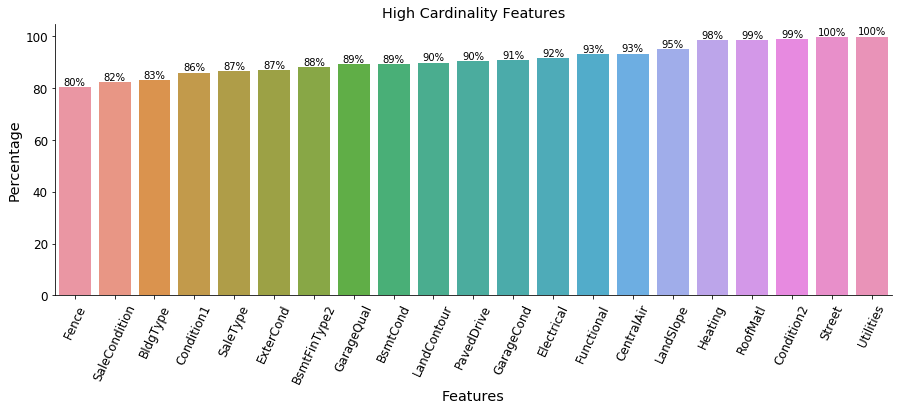

In [164]:
plt.figure(figsize=(15,5))
graph = sns.barplot(x=high_freq_df.Feature, y=high_freq_df.Percetage)
plt.xticks(rotation=65)

for p in graph.patches:
    graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                ha='center', va='bottom', color= 'black')

plt.xlabel('Features')    
plt.ylabel('Percentage')
plt.title('High Cardinality Features')

name='High Cardinality Features' 
plt.savefig('images/{}.png'.format(name))     

In [165]:
df.drop(col_drop, axis=1, inplace=True)
print('Total features after dropping categorical features: ', df.shape)

Total features after dropping categorical features:  (2919, 44)



With this we have tried to understand some basics on Outlier Treatment and Feature Engineering. Feature Engineering is the most critical step which determines the success of the model. Hence an in-depth understanding of the domain of the dataset is a huge advantage to derive relevant features necessary for building a Predictive Model.


### How are house prices predicted?

- I will use the Feature Engineered data Ames Housing dataset from my previous post
- We will split the training data into 70:30
- We will train the algorithm with 70% training data and test it against remaining 30%
- We will test predicted vs actual values and using a model evaluation technique to get a score

### Feature Selection:
After being done with Outlier treatment and Feature Engineering we are left with 64 variables. We also saw the correlation percentage to the target variable ‘SalePrice’.

- We will select the features which have more than 40% correlation to the target variable, hence we will drop features that show less than 40% correlation.

### Find correlation for numeric variables


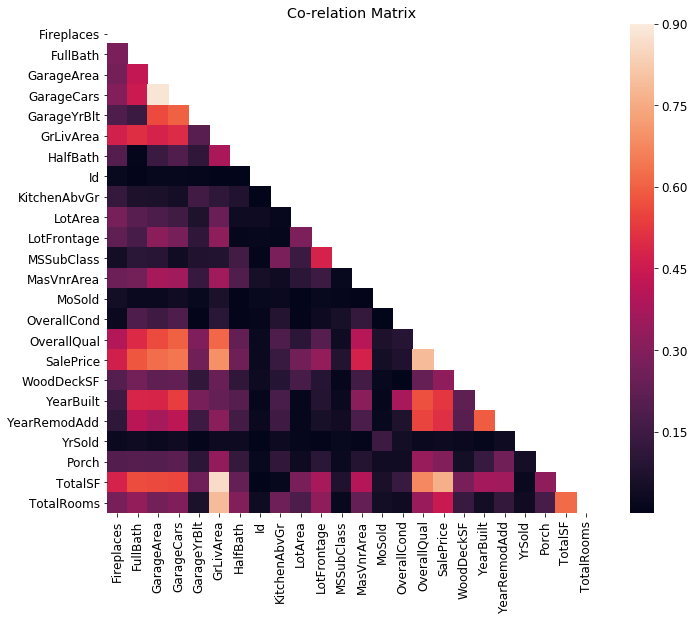

In [166]:
# Correlation map to see how features are correlated with SalePrice
corr = train.corr()
corrmat = corr.abs()

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, mask=mask)

plt.title('Co-relation Matrix')

name='Co-relation Matrix' 
plt.savefig('images/{}.png'.format(name)) 

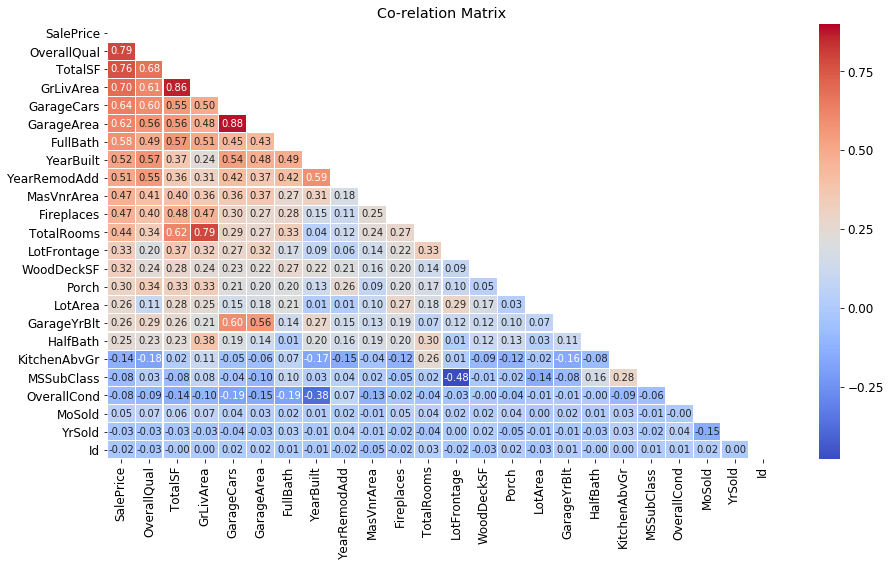

In [167]:
target = 'SalePrice'

corr = train.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_feat)

cols = corr_abs.nlargest(nr_num_cols, target)[target].index
cm = np.corrcoef(train[cols].T)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1, mask=mask,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Co-relation Matrix')

name='Co-relation Matrix1' 
plt.savefig('images/{}.png'.format(name)) 

In [170]:
print(len(num_feat))
print(num_feat)
highLinearFeatures = ['OverallQual', 'TotalSF', 'GarageCars', 'FullBath', 'MasVnrArea', 'WoodDeckSF','SalePrice']

highLinearFeatures

24
Index(['Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'MSSubClass', 'MasVnrArea', 'MoSold', 'OverallCond', 'OverallQual',
       'SalePrice', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold',
       'Porch', 'TotalSF', 'TotalRooms'],
      dtype='object')


['OverallQual',
 'TotalSF',
 'GarageCars',
 'FullBath',
 'MasVnrArea',
 'WoodDeckSF',
 'SalePrice']

### Scatter plots between 'SalePrice' and correlated variables

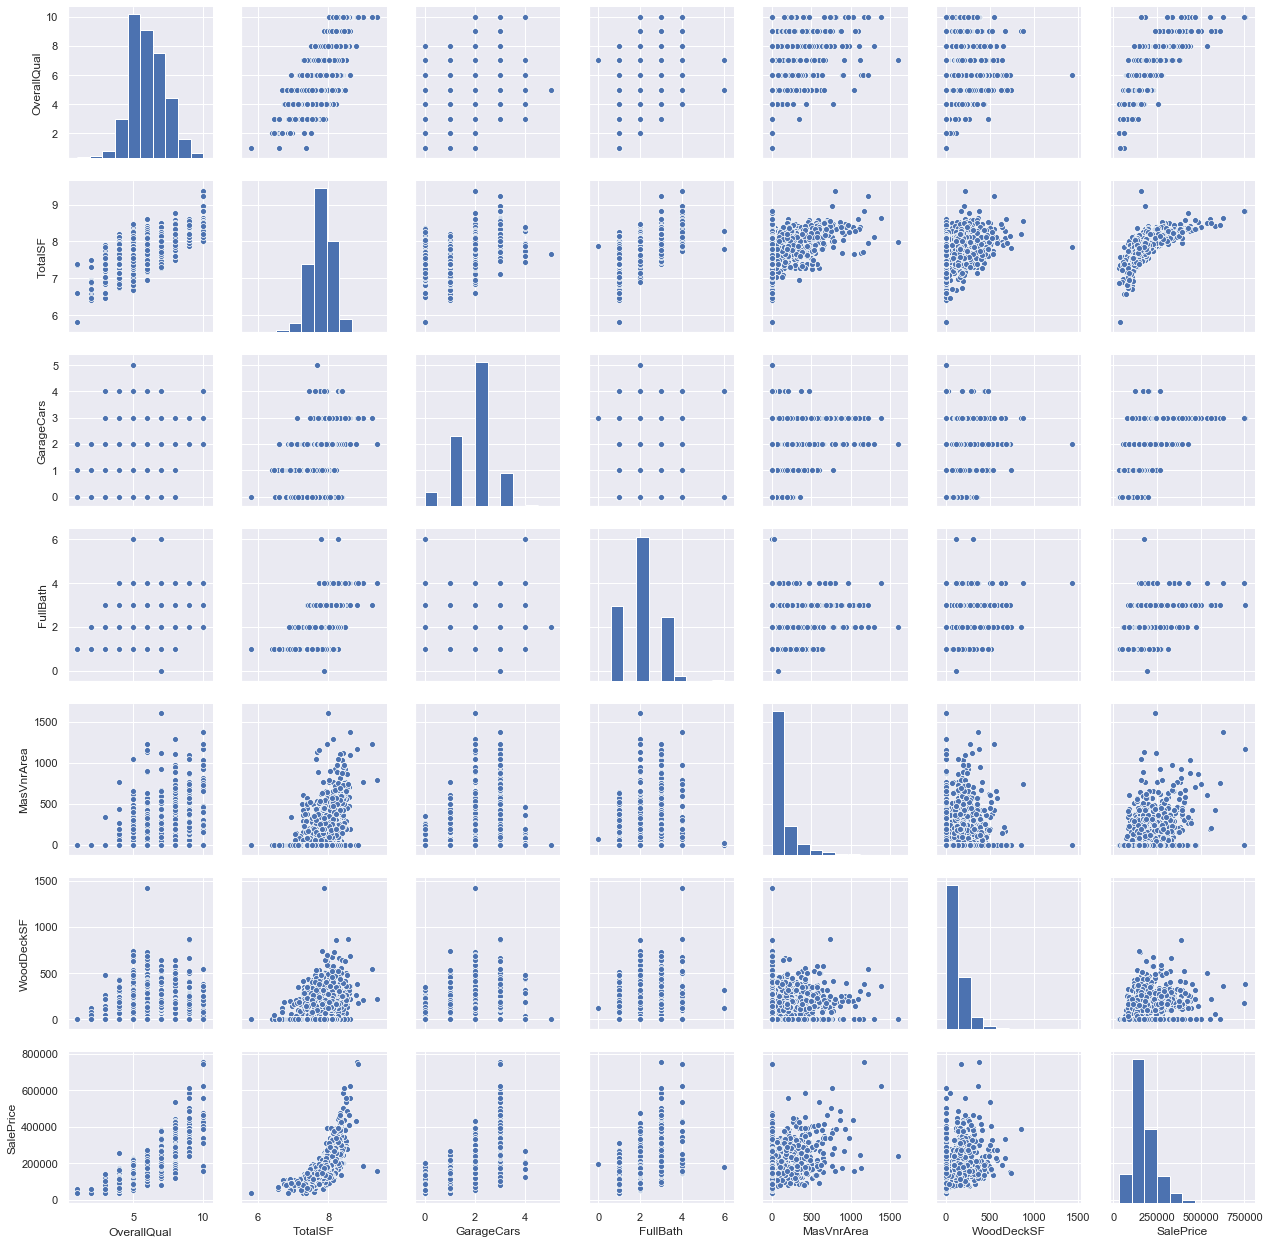

In [171]:
#scatterplot
sns.set()
sns.pairplot(df[highLinearFeatures], size = 2.5)
plt.show();

In [172]:
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

col_drop_corr = []
cor_df = pd.DataFrame(ser_corr)
for col in cor_df.index:
    if cor_df.loc[col,'SalePrice'] < 0.4 and col != 'Id':
        col_drop_corr.append(col)
        
col_drop_corr        

['LotFrontage',
 'WoodDeckSF',
 'Porch',
 'LotArea',
 'GarageYrBlt',
 'HalfBath',
 'KitchenAbvGr',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 'YrSold']

In [173]:
df.drop(col_drop_corr, axis=1, inplace=True)
print('Total features: ', df.shape)

Total features:  (2919, 33)


In [174]:
print(len(df.columns))
df.columns

33


Index(['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageFinish', 'GarageType', 'GrLivArea',
       'HeatingQC', 'HouseStyle', 'Id', 'KitchenQual', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'Neighborhood', 'OverallQual',
       'RoofStyle', 'SalePrice', 'source', 'TotalSF', 'TotalRooms',
       'YearBltAge', 'RemodAge'],
      dtype='object')

Hence we would be using 31 features in our model ( excluding ‘source’ and ‘ID’ variables)

Since we have a mix of numeric and non-numeric features, we need to convert them to numeric for the algorithm to interpret them. Hence we will use encoding and create dummy features.

In [175]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
cat_cols

Index(['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'FireplaceQu', 'Foundation', 'GarageFinish',
       'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'RoofStyle',
       'source'],
      dtype='object')

In [177]:
df.select_dtypes(include='object').columns

Index(['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'FireplaceQu', 'Foundation', 'GarageFinish',
       'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'RoofStyle',
       'source'],
      dtype='object')

In [178]:
#Integer conversions (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

# cat_cols = ['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st','Exterior2nd', 'FireplaceQu', 
#            'Foundation','GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotConfig', 'LotShape',
#            'MSZoning','MasVnrType', 'Neighborhood','RoofStyle'] 
for i in cat_cols:
     df[i] = lc.fit_transform(df[i])
    
df.shape

(2919, 33)

In [179]:
#One hot encoding

col_encod = ['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterQual', 'Exterior1st','Exterior2nd', 'FireplaceQu', 
             'Fireplaces', 'Foundation', 'FullBath', 'GarageCars', 'GarageFinish', 'GarageType', 'HeatingQC', 
             'HouseStyle', 'KitchenQual', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 
             'OverallQual', 'RoofStyle', 'TotalRooms']
df = pd.get_dummies(df, columns=col_encod)

df.shape

(2919, 193)

As you can see from the result there columns have increased due to encoding. (We could have had fewer by making yearbuilt and yearremodadd into fewer buckets)

We will divide the dataset back into our original Train and Test sets.

- Train – has values for SalePrice

- Test – without SalePrice values which we need to predict.

In [180]:
#Dividing back into test and train dataset
train = df.loc[df['source'] == 1] # 'train'
test = df.loc[df['source'] == 0] # 'test'
print(train.shape, test.shape)

(1460, 193) (1459, 193)


In [181]:
test.drop(['source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)

In [182]:
print(train.shape, test.shape)

(1460, 192) (1459, 192)


### Modeling

In [183]:
#Importing algorithm libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We will now split our training set into 2 sets one for training and other to compare our model and see how accurately it predicts the values.

In [184]:
#Split-out validation dataset
pred_col = [x for x in train.columns if x not in ['SalePrice', 'Id']]
X = train[pred_col]
y = train['SalePrice']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 190), (438, 190), (1022,), (438,))

In [186]:
#Declare algorithm
lin_reg = LinearRegression()

#Fit the training set
lin_reg.fit(X_train, y_train)

score = lin_reg.score(X_test,y_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.804574


The above function used for measuring the model accuracy is called R – Squared and it shows that our model has 80.4% accuracy rate in predicting the values

### # Baseline model

In [187]:
summary_cols=['Model','Train Accuracy','Test Accuracy']
df_summary = pd.DataFrame(columns=summary_cols)

from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression().fit(X_train, y_train)
linreg_pred_train = linreg.predict(X_train)
linereg_pred_test = linreg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - linereg_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - linreg_pred_train)**2))
print("test rmse : ", rmse_test)
print("train rmse : ", rmse_train)

df_summary.loc[len(df_summary)] = {'Model':'LinearRegression', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

test rmse :  36424.49066384554
train rmse :  24781.734568893844


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49


In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

hyper_param = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}

lin_reg_cv = LinearRegression()
lin_reg_cv = GridSearchCV(lin_reg_cv, hyper_param, cv=10)
lin_reg_cv.fit(X_train, y_train)

linreg_pred_train = linreg.predict(X_train)
linereg_pred_test = linreg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - linereg_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - linreg_pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

df_summary.loc[len(df_summary)] = {'Model':'LinearRegression with CV', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

**************************************************
Test RMSE  :  36424.49066384554
Train RMSE :  24781.734568893844
**************************************************


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49
1,LinearRegression with CV,24781.73,36424.49


In [189]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

rmse_test = np.sqrt(np.mean((y_test - y_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - y_pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)
# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

df_summary.loc[len(df_summary)] = {'Model':'DecisionTreeRegressor', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

**************************************************
Test RMSE  :  39712.81724450475
Train RMSE :  165.89023320142832
**************************************************


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49
1,LinearRegression with CV,24781.73,36424.49
2,DecisionTreeRegressor,165.89,39712.82


In [190]:
from sklearn.tree import DecisionTreeRegressor
dt_cv = DecisionTreeRegressor(random_state = 0)
hyper_param={#"max_depth": range(2,50),
            'splitter':['best','random'],             
             'max_features':['auto','sqrt','log2'],
             'presort':[True,False]
            }
dt_cv = GridSearchCV(dt_cv, hyper_param, cv=4, verbose=1)
dt_cv.fit(X_train,y_train)
y_pred_test = dt_cv.predict(X_test)
y_pred_train = dt.predict(X_train)

rmse_test = np.sqrt(np.mean((y_test - y_pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - y_pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)
# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

df_summary.loc[len(df_summary)] = {'Model':'DecisionTreeRegressor with CV', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

# print('Accuracy', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


**************************************************
Test RMSE  :  39712.81724450475
Train RMSE :  165.89023320142832
**************************************************


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s finished


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49
1,LinearRegression with CV,24781.73,36424.49
2,DecisionTreeRegressor,165.89,39712.82
3,DecisionTreeRegressor with CV,165.89,39712.82


In [191]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

df_summary.loc[len(df_summary)] = {'Model':'RandomForestRegressor', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

**************************************************
Test RMSE  :  36194.82907817291
Train RMSE :  13458.077736741241
**************************************************


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49
1,LinearRegression with CV,24781.73,36424.49
2,DecisionTreeRegressor,165.89,39712.82
3,DecisionTreeRegressor with CV,165.89,39712.82
4,RandomForestRegressor,13458.08,36194.83


In [192]:
import math

print("*"*50)
rmse_est = {}
for est in range(300,550,20):
    model = RandomForestRegressor(n_estimators=est, n_jobs=-1)
    model.fit(X_train, y_train)
    predictions = np.array(model.predict(X_test))
    rmse = math.sqrt(np.mean((np.array(y_test) - predictions)**2))
    imp = sorted(zip(X.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)
    print ("RMSE: {0} - est: {1}".format(str(rmse), est))
    rmse_est[rmse]= est
print("*"*50)   

**************************************************
RMSE: 32787.76862074939 - est: 300
RMSE: 32575.09438790628 - est: 320
RMSE: 32940.91527587355 - est: 340
RMSE: 32869.414589493535 - est: 360
RMSE: 32997.67363739052 - est: 380
RMSE: 33119.30873743338 - est: 400
RMSE: 32746.964123994305 - est: 420
RMSE: 32859.75052159132 - est: 440
RMSE: 32980.24201095346 - est: 460
RMSE: 32902.84316971906 - est: 480
RMSE: 33009.13163926536 - est: 500
RMSE: 32983.14502175012 - est: 520
RMSE: 32924.94477277552 - est: 540
**************************************************


In [193]:
import collections
d = collections.OrderedDict(sorted(rmse_est.items()))

final_model = RandomForestRegressor(n_estimators=list(d.items())[0][1], n_jobs=-1)
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=320, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [194]:
pred_train = final_model.predict(X_train)
pred_test = final_model.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - pred_test)**2))
rmse_train = np.sqrt(np.mean((y_train - pred_train)**2))
print("*"*50)
print("Test RMSE  : ", rmse_test)
print("Train RMSE : ", rmse_train)
print("*"*50)

df_summary.loc[len(df_summary)] = {'Model':'RandomForestRegressor with CV', 'Train Accuracy':rmse_train, 'Test Accuracy':rmse_test}
df_summary

**************************************************
Test RMSE  :  33033.40199745497
Train RMSE :  11243.92513130191
**************************************************


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,24781.73,36424.49
1,LinearRegression with CV,24781.73,36424.49
2,DecisionTreeRegressor,165.89,39712.82
3,DecisionTreeRegressor with CV,165.89,39712.82
4,RandomForestRegressor,13458.08,36194.83
5,RandomForestRegressor with CV,11243.93,33033.40


In [195]:
from sklearn.externals import joblib
final_model_name = "RandomForestReg.model"
joblib.dump(final_model, final_model_name)

['RandomForestReg.model']

In [196]:
from sklearn.externals import joblib
model_name = "RandomForestReg.model"
final_model = joblib.load(model_name)

In [197]:
df_summary.drop(['Train Accuracy'], axis=1, inplace=True)
df_summary

,Model,Test Accuracy
0,LinearRegression,36424.49
1,LinearRegression with CV,36424.49
2,DecisionTreeRegressor,39712.82
3,DecisionTreeRegressor with CV,39712.82
4,RandomForestRegressor,36194.83
5,RandomForestRegressor with CV,33033.40


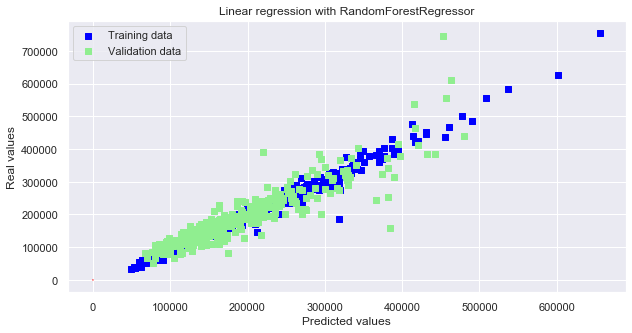

In [215]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
#submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_test_pred})
#submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with RandomForestRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
# plt.show()
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

### Creation of submission file.
Lets try to submit this code to kaggle.

In [646]:
cols = list(test.columns)
cols.remove('Id')
cols.remove('SalePrice')
len(cols)

190

In [647]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

y_test_pred = final_model.predict(test[cols])

submission = pd.DataFrame({"Id": test['Id'],"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "Final_submission_{}.csv".format(timestr)
submission.to_csv(fileName, index=False)

**Your submission scored 0.15781**